# import

In [4]:
# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

In [5]:
import numpy as np
import pandas as pd 
from os import path

In [6]:
import taproc as tp
from taproc.pre_processing import *
from taproc.dataset import *
from taproc.learner import *
from taproc.feature import *
from taproc.interpretation import *

# read file

In [7]:
file_path = Path('/media/zero/dropbox/Dropbox/Data science project/kaggle/home_credit_default_risk/data')

In [8]:
app_train = pd.read_csv(str(file_path/'application_train.csv'))

In [9]:
app_train_proc, y, na_dict = tabular_proc(app_train, y_fld = 'TARGET', max_n_cat=15)

# train test split from sklearn

In [10]:
ds = TBDataset.from_SklearnSplit(app_train_proc, y)

# baseline model

In [19]:
params = {
    'task': 'train',
    'objective': 'binary',
    'n_estimators':100,
    'learning_rate':0.05,
    'num_leaves':30,
    'colsample_bytree':.8,
    'subsample':.9,
    'max_depth':7,
    'reg_alpha':.1,
    'reg_lambda':.1,
    'min_split_gain':.01,
    'min_child_weight':2,
    'verbose':-1,
    'metric': 'binary_logloss'}

In [17]:
learner = LGBLearner()

In [10]:
learner.fit(params, *ds.trn_n_val(), early_stopping_rounds=50)

Training until validation scores don't improve for 50 rounds.
[100]	training's binary_logloss: 0.245703	valid_1's binary_logloss: 0.248836
Did not meet early stopping. Best iteration is:
[100]	training's binary_logloss: 0.245703	valid_1's binary_logloss: 0.248836


# dendrogram

In [12]:
ddg = Dendogram.from_df(ds.x_trn)

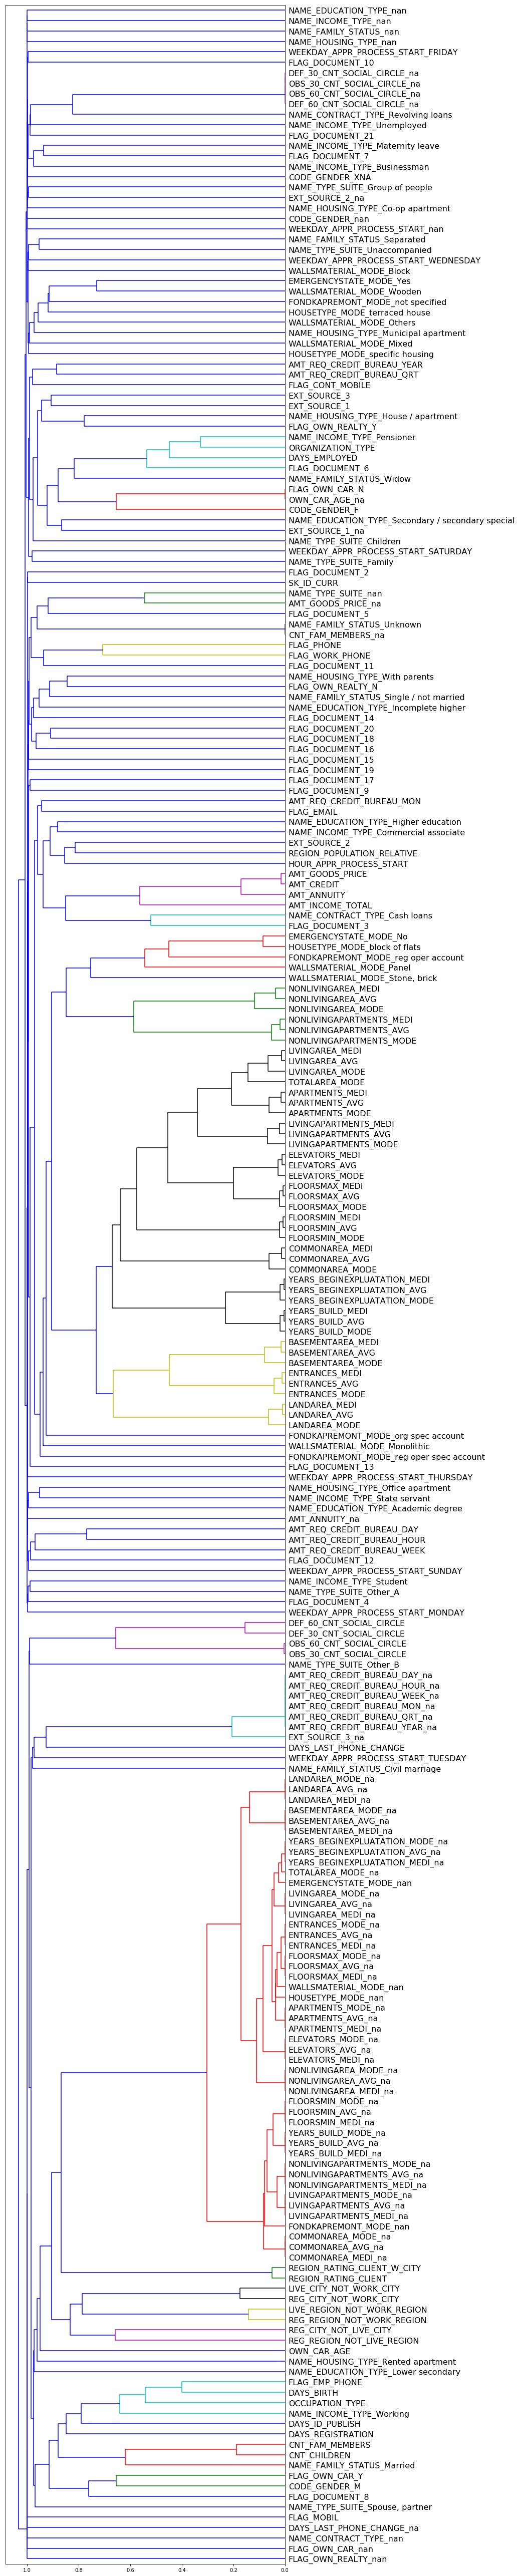

In [13]:
ddg.plot()

In [14]:
ddg.result.head(10)

,col1,col2,dist
0,OWN_CAR_AGE_na,FLAG_OWN_CAR_N,0.0
1,YEARS_BEGINEXPLUATATION_AVG_na,YEARS_BEGINEXPLUATATION_MODE_na,0.0
2,YEARS_BEGINEXPLUATATION_MEDI_na,---,0.0
3,FLOORSMAX_AVG_na,FLOORSMAX_MODE_na,0.0
4,FLOORSMAX_MEDI_na,---,0.0
5,ENTRANCES_AVG_na,ENTRANCES_MODE_na,0.0
6,ENTRANCES_MEDI_na,---,0.0
7,APARTMENTS_AVG_na,APARTMENTS_MODE_na,0.0
8,APARTMENTS_MEDI_na,---,0.0
9,LIVINGAREA_AVG_na,LIVINGAREA_MODE_na,0.0


In [11]:
cluster = [['FLAG_OWN_CAR_N', 'OWN_CAR_AGE'],
     ['AMT_GOODS_PRICE', 'AMT_CREDIT', 'AMT_ANNUITY'],
     ['EMERGENCYSTATE_MODE_No', 'HOUSETYPE_MODE_block of flats'],
     ['NONLIVINGAREA_AVG', 'NONLIVINGAREA_MODE', 'NONLIVINGAREA_MEDI'],
     ['NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAPARTMENTS_MEDI'],
     ['LIVINGAREA_AVG', 'LIVINGAREA_MEDI', 'LIVINGAREA_MODE','TOTALAREA_MODE'],
     ['APARTMENTS_AVG', 'APARTMENTS_MEDI', 'APARTMENTS_MODE'],
     ['LIVINGAPARTMENTS_MODE', 'LIVINGAPARTMENTS_AVG', 'LIVINGAPARTMENTS_MEDI'],
     ['ELEVATORS_AVG', 'ELEVATORS_MEDI', 'ELEVATORS_MODE'],
     ['FLOORSMAX_AVG', 'FLOORSMAX_MEDI', 'FLOORSMAX_MODE'],
     ['FLOORSMIN_AVG', 'FLOORSMIN_MEDI', 'FLOORSMIN_MODE'],
     ['COMMONAREA_AVG', 'COMMONAREA_MEDI', 'COMMONAREA_MODE'],
     ['YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BEGINEXPLUATATION_MODE'],
     ['YEARS_BUILD_AVG', 'YEARS_BUILD_MEDI', 'YEARS_BUILD_MODE'],
     ['BASEMENTAREA_AVG', 'BASEMENTAREA_MEDI', 'BASEMENTAREA_MODE'],
     ['ENTRANCES_AVG', 'ENTRANCES_MEDI', 'ENTRANCES_MODE'],
     ['LANDAREA_AVG', 'LANDAREA_MODE', 'LANDAREA_MEDI'],
     ['DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE'],
     ['OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE'],
     ['LANDAREA_AVG_na', 'LANDAREA_MODE_na','LANDAREA_MEDI_na'],
     ['BASEMENTAREA_AVG_na', 'BASEMENTAREA_MODE_na', 'BASEMENTAREA_MEDI_na'],
     ['AMT_REQ_CREDIT_BUREAU_HOUR_na', 'AMT_REQ_CREDIT_BUREAU_DAY_na', 
      'AMT_REQ_CREDIT_BUREAU_WEEK_na', 'AMT_REQ_CREDIT_BUREAU_MON_na', 
      'AMT_REQ_CREDIT_BUREAU_QRT_na', 'AMT_REQ_CREDIT_BUREAU_YEAR_na'],
     ['LANDAREA_AVG_na', 'LANDAREA_MODE_na', 'LANDAREA_MEDI_na'],
     ['BASEMENTAREA_AVG_na', 'BASEMENTAREA_MODE_na', 'BASEMENTAREA_MEDI_na'],
     ['YEARS_BEGINEXPLUATATION_AVG_na', 'YEARS_BEGINEXPLUATATION_MODE_na', 
      'YEARS_BEGINEXPLUATATION_MEDI_na', 'TOTALAREA_MODE_na', 'EMERGENCYSTATE_MODE_nan'],
     ['LIVINGAREA_AVG_na', 'LIVINGAREA_MODE_na', 'LIVINGAREA_MEDI_na'],
     ['ENTRANCES_AVG_na', 'ENTRANCES_MODE_na', 'ENTRANCES_MEDI_na',
      'FLOORSMAX_AVG_na', 'FLOORSMAX_MODE_na', 'FLOORSMAX_MEDI_na', 'WALLSMATERIAL_MODE_nan'],
     ['APARTMENTS_AVG_na', 'APARTMENTS_MODE_na', 'APARTMENTS_MEDI_na', 'HOUSETYPE_MODE_nan'],
     ['ELEVATORS_AVG_na', 'ELEVATORS_MODE_na', 'ELEVATORS_MEDI_na'],
     ['NONLIVINGAREA_AVG_na', 'NONLIVINGAREA_MODE_na', 'NONLIVINGAREA_MEDI_na'],
     ['FLOORSMIN_AVG_na', 'FLOORSMIN_MODE_na', 'FLOORSMIN_MEDI_na'],
     ['YEARS_BUILD_AVG_na', 'YEARS_BUILD_MODE_na', 'YEARS_BUILD_MEDI_na'],
     ['NONLIVINGAPARTMENTS_AVG_na', 'NONLIVINGAPARTMENTS_MODE_na', 'NONLIVINGAPARTMENTS_MEDI_na'],
     ['LIVINGAPARTMENTS_AVG_na', 'LIVINGAPARTMENTS_MODE_na', 'LIVINGAPARTMENTS_MEDI_na'],
     ['COMMONAREA_AVG_na', 'COMMONAREA_MODE_na', 'COMMONAREA_MEDI_na'],
     ['REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY']]

In [12]:
group_cols = ddg.group_cols(cluster)

NameError: name 'ddg' is not defined

In [13]:
group_cols = [['FLAG_OWN_CAR_N', 'OWN_CAR_AGE'],
 ['AMT_GOODS_PRICE', 'AMT_CREDIT', 'AMT_ANNUITY'],
 ['EMERGENCYSTATE_MODE_No', 'HOUSETYPE_MODE_block of flats'],
 ['NONLIVINGAREA_AVG', 'NONLIVINGAREA_MODE', 'NONLIVINGAREA_MEDI'],
 ['NONLIVINGAPARTMENTS_MODE',
  'NONLIVINGAPARTMENTS_AVG',
  'NONLIVINGAPARTMENTS_MEDI'],
 ['LIVINGAREA_AVG', 'LIVINGAREA_MEDI', 'LIVINGAREA_MODE', 'TOTALAREA_MODE'],
 ['APARTMENTS_AVG', 'APARTMENTS_MEDI', 'APARTMENTS_MODE'],
 ['LIVINGAPARTMENTS_MODE', 'LIVINGAPARTMENTS_AVG', 'LIVINGAPARTMENTS_MEDI'],
 ['ELEVATORS_AVG', 'ELEVATORS_MEDI', 'ELEVATORS_MODE'],
 ['FLOORSMAX_AVG', 'FLOORSMAX_MEDI', 'FLOORSMAX_MODE'],
 ['FLOORSMIN_AVG', 'FLOORSMIN_MEDI', 'FLOORSMIN_MODE'],
 ['COMMONAREA_AVG', 'COMMONAREA_MEDI', 'COMMONAREA_MODE'],
 ['YEARS_BEGINEXPLUATATION_AVG',
  'YEARS_BEGINEXPLUATATION_MEDI',
  'YEARS_BEGINEXPLUATATION_MODE'],
 ['YEARS_BUILD_AVG', 'YEARS_BUILD_MEDI', 'YEARS_BUILD_MODE'],
 ['BASEMENTAREA_AVG', 'BASEMENTAREA_MEDI', 'BASEMENTAREA_MODE'],
 ['ENTRANCES_AVG', 'ENTRANCES_MEDI', 'ENTRANCES_MODE'],
 ['LANDAREA_AVG', 'LANDAREA_MODE', 'LANDAREA_MEDI'],
 ['DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE'],
 ['OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE'],
 ['LANDAREA_AVG_na', 'LANDAREA_MODE_na', 'LANDAREA_MEDI_na'],
 ['BASEMENTAREA_AVG_na', 'BASEMENTAREA_MODE_na', 'BASEMENTAREA_MEDI_na'],
 ['AMT_REQ_CREDIT_BUREAU_HOUR_na',
  'AMT_REQ_CREDIT_BUREAU_DAY_na',
  'AMT_REQ_CREDIT_BUREAU_WEEK_na',
  'AMT_REQ_CREDIT_BUREAU_MON_na',
  'AMT_REQ_CREDIT_BUREAU_QRT_na',
  'AMT_REQ_CREDIT_BUREAU_YEAR_na'],
 ['LANDAREA_AVG_na', 'LANDAREA_MODE_na', 'LANDAREA_MEDI_na'],
 ['BASEMENTAREA_AVG_na', 'BASEMENTAREA_MODE_na', 'BASEMENTAREA_MEDI_na'],
 ['YEARS_BEGINEXPLUATATION_AVG_na',
  'YEARS_BEGINEXPLUATATION_MODE_na',
  'YEARS_BEGINEXPLUATATION_MEDI_na',
  'TOTALAREA_MODE_na',
  'EMERGENCYSTATE_MODE_nan'],
 ['LIVINGAREA_AVG_na', 'LIVINGAREA_MODE_na', 'LIVINGAREA_MEDI_na'],
 ['ENTRANCES_AVG_na',
  'ENTRANCES_MODE_na',
  'ENTRANCES_MEDI_na',
  'FLOORSMAX_AVG_na',
  'FLOORSMAX_MODE_na',
  'FLOORSMAX_MEDI_na',
  'WALLSMATERIAL_MODE_nan'],
 ['APARTMENTS_AVG_na',
  'APARTMENTS_MODE_na',
  'APARTMENTS_MEDI_na',
  'HOUSETYPE_MODE_nan'],
 ['ELEVATORS_AVG_na', 'ELEVATORS_MODE_na', 'ELEVATORS_MEDI_na'],
 ['NONLIVINGAREA_AVG_na', 'NONLIVINGAREA_MODE_na', 'NONLIVINGAREA_MEDI_na'],
 ['FLOORSMIN_AVG_na', 'FLOORSMIN_MODE_na', 'FLOORSMIN_MEDI_na'],
 ['YEARS_BUILD_AVG_na', 'YEARS_BUILD_MODE_na', 'YEARS_BUILD_MEDI_na'],
 ['NONLIVINGAPARTMENTS_AVG_na',
  'NONLIVINGAPARTMENTS_MODE_na',
  'NONLIVINGAPARTMENTS_MEDI_na'],
 ['LIVINGAPARTMENTS_AVG_na',
  'LIVINGAPARTMENTS_MODE_na',
  'LIVINGAPARTMENTS_MEDI_na'],
 ['COMMONAREA_AVG_na', 'COMMONAREA_MODE_na', 'COMMONAREA_MEDI_na'],
 ['REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY'],
 'SK_ID_CURR',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'DAYS_LAST_PHONE_CHANGE',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'AMT_ANNUITY_na',
 'AMT_GOODS_PRICE_na',
 'OWN_CAR_AGE_na',
 'CNT_FAM_MEMBERS_na',
 'EXT_SOURCE_1_na',
 'EXT_SOURCE_2_na',
 'EXT_SOURCE_3_na',
 'OBS_30_CNT_SOCIAL_CIRCLE_na',
 'DEF_30_CNT_SOCIAL_CIRCLE_na',
 'OBS_60_CNT_SOCIAL_CIRCLE_na',
 'DEF_60_CNT_SOCIAL_CIRCLE_na',
 'DAYS_LAST_PHONE_CHANGE_na',
 'NAME_CONTRACT_TYPE_Cash loans',
 'NAME_CONTRACT_TYPE_Revolving loans',
 'NAME_CONTRACT_TYPE_nan',
 'CODE_GENDER_F',
 'CODE_GENDER_M',
 'CODE_GENDER_XNA',
 'CODE_GENDER_nan',
 'FLAG_OWN_CAR_Y',
 'FLAG_OWN_CAR_nan',
 'FLAG_OWN_REALTY_N',
 'FLAG_OWN_REALTY_Y',
 'FLAG_OWN_REALTY_nan',
 'NAME_TYPE_SUITE_Children',
 'NAME_TYPE_SUITE_Family',
 'NAME_TYPE_SUITE_Group of people',
 'NAME_TYPE_SUITE_Other_A',
 'NAME_TYPE_SUITE_Other_B',
 'NAME_TYPE_SUITE_Spouse, partner',
 'NAME_TYPE_SUITE_Unaccompanied',
 'NAME_TYPE_SUITE_nan',
 'NAME_INCOME_TYPE_Businessman',
 'NAME_INCOME_TYPE_Commercial associate',
 'NAME_INCOME_TYPE_Maternity leave',
 'NAME_INCOME_TYPE_Pensioner',
 'NAME_INCOME_TYPE_State servant',
 'NAME_INCOME_TYPE_Student',
 'NAME_INCOME_TYPE_Unemployed',
 'NAME_INCOME_TYPE_Working',
 'NAME_INCOME_TYPE_nan',
 'NAME_EDUCATION_TYPE_Academic degree',
 'NAME_EDUCATION_TYPE_Higher education',
 'NAME_EDUCATION_TYPE_Incomplete higher',
 'NAME_EDUCATION_TYPE_Lower secondary',
 'NAME_EDUCATION_TYPE_Secondary / secondary special',
 'NAME_EDUCATION_TYPE_nan',
 'NAME_FAMILY_STATUS_Civil marriage',
 'NAME_FAMILY_STATUS_Married',
 'NAME_FAMILY_STATUS_Separated',
 'NAME_FAMILY_STATUS_Single / not married',
 'NAME_FAMILY_STATUS_Unknown',
 'NAME_FAMILY_STATUS_Widow',
 'NAME_FAMILY_STATUS_nan',
 'NAME_HOUSING_TYPE_Co-op apartment',
 'NAME_HOUSING_TYPE_House / apartment',
 'NAME_HOUSING_TYPE_Municipal apartment',
 'NAME_HOUSING_TYPE_Office apartment',
 'NAME_HOUSING_TYPE_Rented apartment',
 'NAME_HOUSING_TYPE_With parents',
 'NAME_HOUSING_TYPE_nan',
 'WEEKDAY_APPR_PROCESS_START_FRIDAY',
 'WEEKDAY_APPR_PROCESS_START_MONDAY',
 'WEEKDAY_APPR_PROCESS_START_SATURDAY',
 'WEEKDAY_APPR_PROCESS_START_SUNDAY',
 'WEEKDAY_APPR_PROCESS_START_THURSDAY',
 'WEEKDAY_APPR_PROCESS_START_TUESDAY',
 'WEEKDAY_APPR_PROCESS_START_WEDNESDAY',
 'WEEKDAY_APPR_PROCESS_START_nan',
 'FONDKAPREMONT_MODE_not specified',
 'FONDKAPREMONT_MODE_org spec account',
 'FONDKAPREMONT_MODE_reg oper account',
 'FONDKAPREMONT_MODE_reg oper spec account',
 'FONDKAPREMONT_MODE_nan',
 'HOUSETYPE_MODE_specific housing',
 'HOUSETYPE_MODE_terraced house',
 'WALLSMATERIAL_MODE_Block',
 'WALLSMATERIAL_MODE_Mixed',
 'WALLSMATERIAL_MODE_Monolithic',
 'WALLSMATERIAL_MODE_Others',
 'WALLSMATERIAL_MODE_Panel',
 'WALLSMATERIAL_MODE_Stone, brick',
 'WALLSMATERIAL_MODE_Wooden',
 'EMERGENCYSTATE_MODE_Yes']

# feature importance

In [20]:
impt = Importance.from_Learner(learner, ds, group_cols)

In [21]:
impt.I[:5]

,Feature,Importance
62,EXT_SOURCE_3,0.070686
61,EXT_SOURCE_2,0.061823
60,EXT_SOURCE_1,0.010314
40,DAYS_BIRTH,0.005867
1,AMT_GOODS_PRICE & AMT_CREDIT & AMT_ANNUITY,0.004631


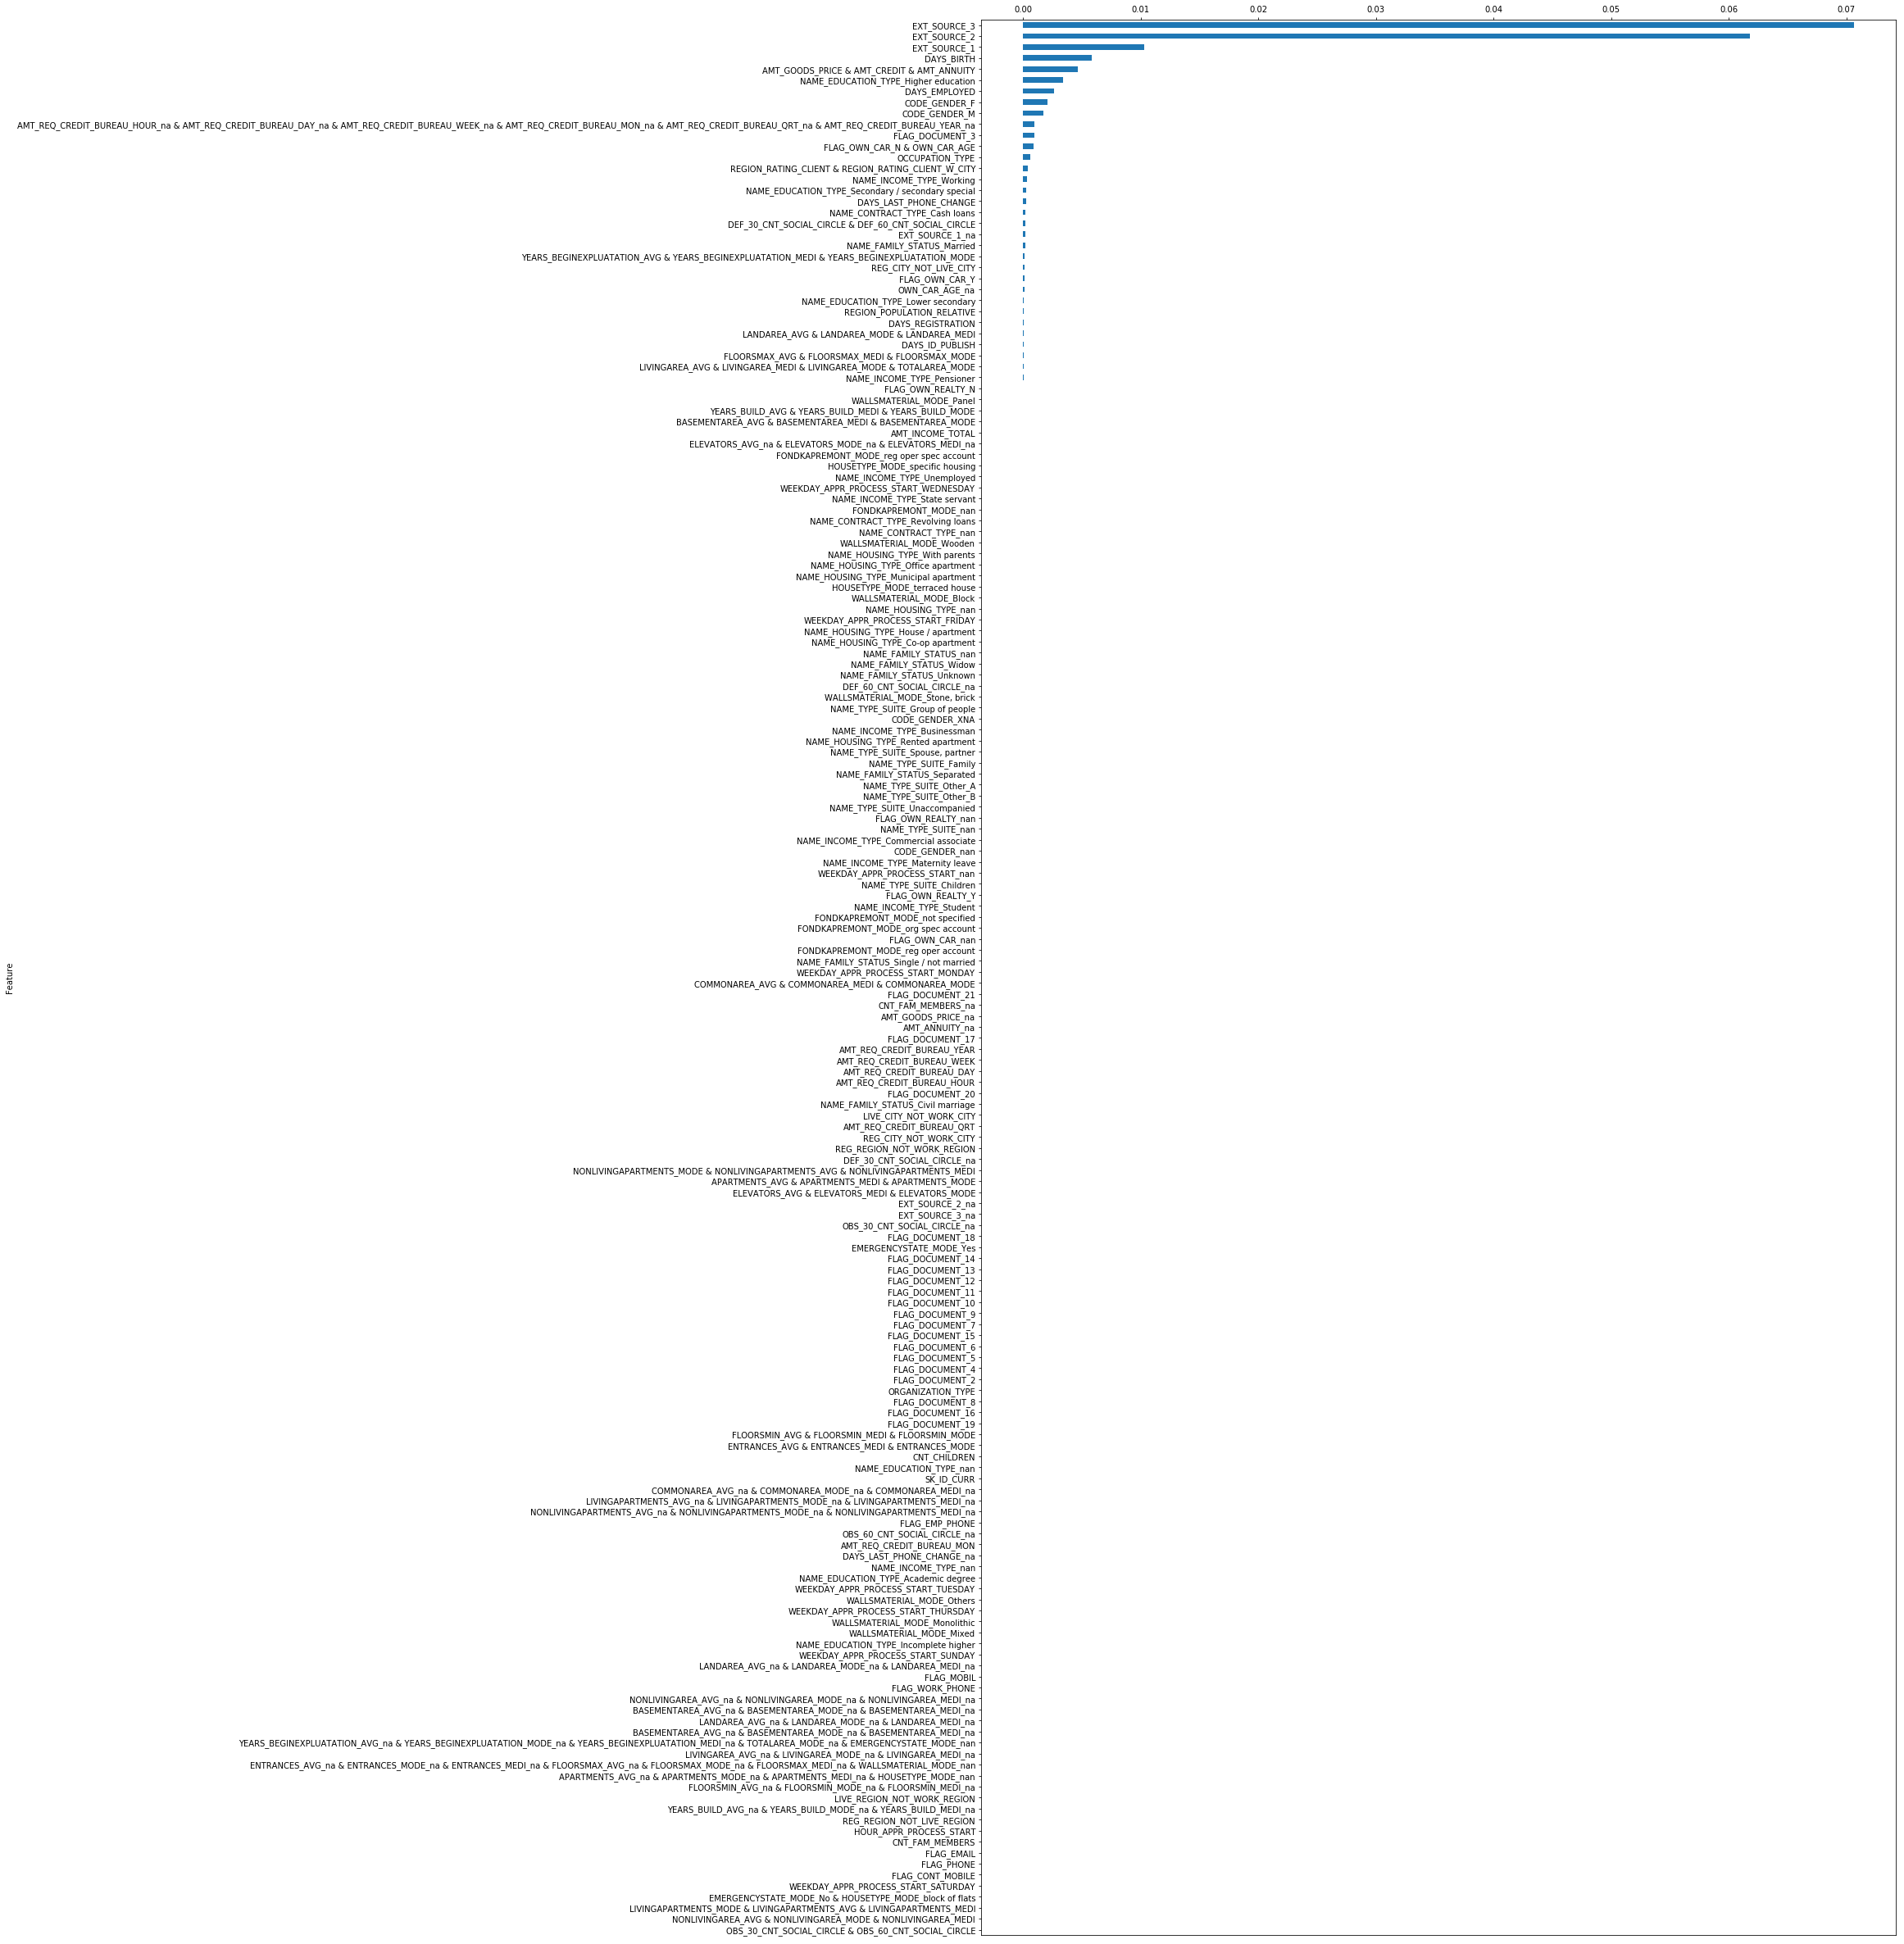

In [23]:
impt.plot()

In [24]:
impt.top(27)

[['EXT_SOURCE_3'],
 ['EXT_SOURCE_2'],
 ['EXT_SOURCE_1'],
 ['DAYS_BIRTH'],
 ['AMT_GOODS_PRICE', 'AMT_CREDIT', 'AMT_ANNUITY'],
 ['NAME_EDUCATION_TYPE_Higher education'],
 ['DAYS_EMPLOYED'],
 ['CODE_GENDER_F'],
 ['CODE_GENDER_M'],
 ['AMT_REQ_CREDIT_BUREAU_HOUR_na',
  'AMT_REQ_CREDIT_BUREAU_DAY_na',
  'AMT_REQ_CREDIT_BUREAU_WEEK_na',
  'AMT_REQ_CREDIT_BUREAU_MON_na',
  'AMT_REQ_CREDIT_BUREAU_QRT_na',
  'AMT_REQ_CREDIT_BUREAU_YEAR_na'],
 ['FLAG_DOCUMENT_3'],
 ['FLAG_OWN_CAR_N', 'OWN_CAR_AGE'],
 ['OCCUPATION_TYPE'],
 ['REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY'],
 ['NAME_INCOME_TYPE_Working'],
 ['NAME_EDUCATION_TYPE_Secondary / secondary special'],
 ['DAYS_LAST_PHONE_CHANGE'],
 ['NAME_CONTRACT_TYPE_Cash loans'],
 ['DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE'],
 ['EXT_SOURCE_1_na'],
 ['NAME_FAMILY_STATUS_Married'],
 ['YEARS_BEGINEXPLUATATION_AVG',
  'YEARS_BEGINEXPLUATATION_MEDI',
  'YEARS_BEGINEXPLUATATION_MODE'],
 ['REG_CITY_NOT_LIVE_CITY'],
 ['FLAG_OWN_CAR_Y'],
 ['OWN_C

In [11]:
impt_ft = [['EXT_SOURCE_3'],
 ['EXT_SOURCE_2'],
 ['EXT_SOURCE_1'],
 ['DAYS_BIRTH'],
 ['AMT_GOODS_PRICE', 'AMT_CREDIT', 'AMT_ANNUITY'],
 ['NAME_EDUCATION_TYPE_Higher education'],
 ['DAYS_EMPLOYED'],
 ['CODE_GENDER_F'],
 ['CODE_GENDER_M'],
 ['AMT_REQ_CREDIT_BUREAU_HOUR_na',
  'AMT_REQ_CREDIT_BUREAU_DAY_na',
  'AMT_REQ_CREDIT_BUREAU_WEEK_na',
  'AMT_REQ_CREDIT_BUREAU_MON_na',
  'AMT_REQ_CREDIT_BUREAU_QRT_na',
  'AMT_REQ_CREDIT_BUREAU_YEAR_na'],
 ['FLAG_DOCUMENT_3'],
 ['FLAG_OWN_CAR_N', 'OWN_CAR_AGE'],
 ['OCCUPATION_TYPE'],
 ['REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY'],
 ['NAME_INCOME_TYPE_Working'],
 ['NAME_EDUCATION_TYPE_Secondary / secondary special'],
 ['DAYS_LAST_PHONE_CHANGE'],
 ['NAME_CONTRACT_TYPE_Cash loans'],
 ['DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE'],
 ['EXT_SOURCE_1_na'],
 ['NAME_FAMILY_STATUS_Married'],
 ['YEARS_BEGINEXPLUATATION_AVG',
  'YEARS_BEGINEXPLUATATION_MEDI',
  'YEARS_BEGINEXPLUATATION_MODE'],
 ['REG_CITY_NOT_LIVE_CITY'],
 ['FLAG_OWN_CAR_Y'],
 ['OWN_CAR_AGE_na'],
 ['NAME_EDUCATION_TYPE_Lower secondary'],
 ['REGION_POPULATION_RELATIVE']]

In [12]:
keep_ft = flat_list(impt_ft)

In [13]:
ds.keep(keep_ft)

In [17]:
learner.fit(params, 
            *ds.trn_n_val(),
            early_stopping_rounds=50,
            verbose_eval=100)

Training until validation scores don't improve for 50 rounds.
[100]	training's binary_logloss: 0.246022	valid_1's binary_logloss: 0.248821
Did not meet early stopping. Best iteration is:
[100]	training's binary_logloss: 0.246022	valid_1's binary_logloss: 0.248821


# feature selection

In [18]:
ddg = Dendogram.from_df(ds.x_trn)

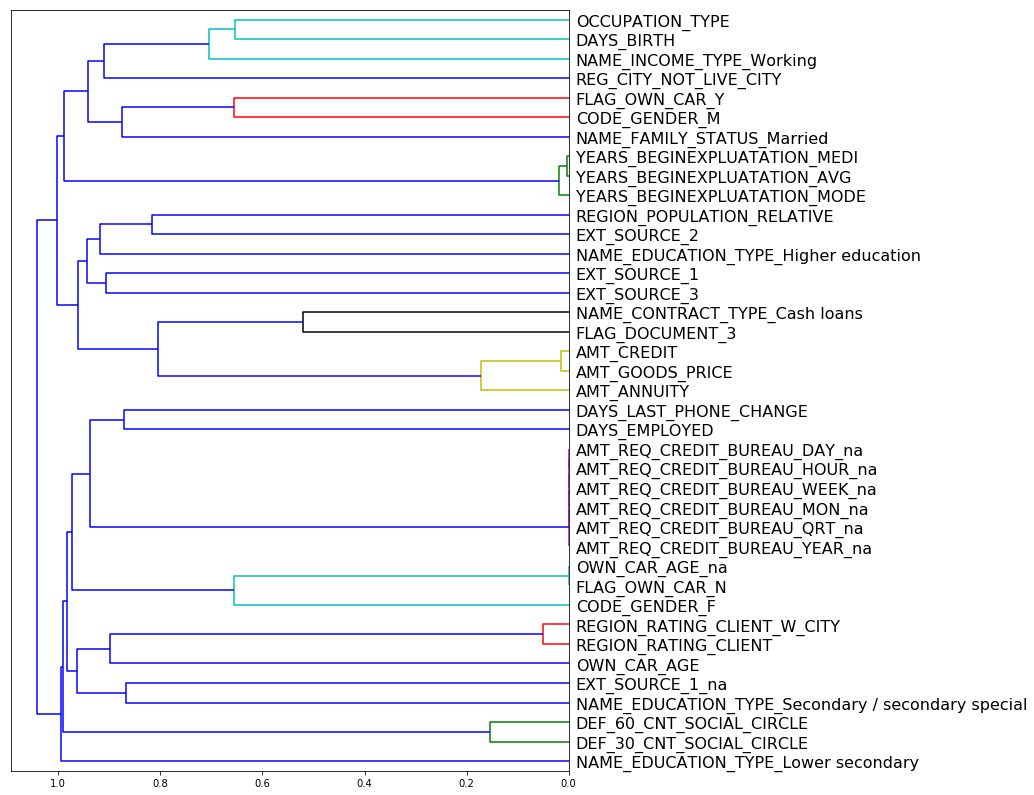

In [19]:
ddg.plot()

In [15]:
cluster = [['YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BEGINEXPLUATATION_MODE'],
            ['AMT_GOODS_PRICE', 'AMT_CREDIT', 'AMT_ANNUITY'],
            ['AMT_REQ_CREDIT_BUREAU_HOUR_na', 'AMT_REQ_CREDIT_BUREAU_DAY_na', 
            'AMT_REQ_CREDIT_BUREAU_WEEK_na', 'AMT_REQ_CREDIT_BUREAU_MON_na', 
            'AMT_REQ_CREDIT_BUREAU_QRT_na', 'AMT_REQ_CREDIT_BUREAU_YEAR_na'],
            ['FLAG_OWN_CAR_N', 'OWN_CAR_AGE'],
            ['REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY'],
            ['DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE']]

In [23]:
params = {
    'task': 'train',
    'objective': 'binary',
    'n_estimators':100,
    'learning_rate':0.05,
    'num_leaves':30,
    'colsample_bytree':.8,
    'subsample':.9,
    'max_depth':7,
    'reg_alpha':.1,
    'reg_lambda':.1,
    'min_split_gain':.01,
    'min_child_weight':2,
    'verbose':1,
    'metric': 'binary_logloss'}

In [24]:
for cols in cluster:    
    for col in cols:
        print(col)
        learner.fit(params, *ds.drop(col), *ds.drop(col, 'val'), early_stopping_rounds=50, verbose_eval=1000)
    print('\n')

YEARS_BEGINEXPLUATATION_AVG
Training until validation scores don't improve for 50 rounds.
Did not meet early stopping. Best iteration is:
[100]	training's binary_logloss: 0.245472	valid_1's binary_logloss: 0.250574
YEARS_BEGINEXPLUATATION_MEDI
Training until validation scores don't improve for 50 rounds.
Did not meet early stopping. Best iteration is:
[100]	training's binary_logloss: 0.245504	valid_1's binary_logloss: 0.250664
YEARS_BEGINEXPLUATATION_MODE
Training until validation scores don't improve for 50 rounds.
Did not meet early stopping. Best iteration is:
[100]	training's binary_logloss: 0.245415	valid_1's binary_logloss: 0.250554


AMT_GOODS_PRICE
Training until validation scores don't improve for 50 rounds.
Did not meet early stopping. Best iteration is:
[100]	training's binary_logloss: 0.246217	valid_1's binary_logloss: 0.251513
AMT_CREDIT
Training until validation scores don't improve for 50 rounds.
Did not meet early stopping. Best iteration is:
[100]	training's binary_log

In [96]:
ds.drop_inplace(['YEARS_BEGINEXPLUATATION_MEDI', 'AMT_GOODS_PRICE',
                'AMT_REQ_CREDIT_BUREAU_HOUR_na', 'AMT_REQ_CREDIT_BUREAU_DAY_na', 
                'AMT_REQ_CREDIT_BUREAU_WEEK_na', 'AMT_REQ_CREDIT_BUREAU_MON_na', 
                'AMT_REQ_CREDIT_BUREAU_QRT_na', 'AMT_REQ_CREDIT_BUREAU_YEAR_na'])

In [97]:
learner.fit(params, *ds.trn_n_val(), early_stopping_rounds=50)

Training until validation scores don't improve for 50 rounds.
[100]	training's binary_logloss: 0.246426	valid_1's binary_logloss: 0.2516
Did not meet early stopping. Best iteration is:
[100]	training's binary_logloss: 0.246426	valid_1's binary_logloss: 0.2516


# explainer

In [98]:
ds.x_val.columns

Index(['EXT_SOURCE_3', 'EXT_SOURCE_2', 'EXT_SOURCE_1', 'DAYS_BIRTH',
       'AMT_CREDIT', 'AMT_ANNUITY', 'NAME_EDUCATION_TYPE_Higher education',
       'DAYS_EMPLOYED', 'CODE_GENDER_F', 'CODE_GENDER_M', 'FLAG_DOCUMENT_3',
       'FLAG_OWN_CAR_N', 'OWN_CAR_AGE', 'OCCUPATION_TYPE',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'NAME_INCOME_TYPE_Working',
       'NAME_EDUCATION_TYPE_Secondary / secondary special',
       'DAYS_LAST_PHONE_CHANGE', 'NAME_CONTRACT_TYPE_Cash loans',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'EXT_SOURCE_1_na', 'NAME_FAMILY_STATUS_Married',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BEGINEXPLUATATION_MODE',
       'REG_CITY_NOT_LIVE_CITY', 'FLAG_OWN_CAR_Y', 'OWN_CAR_AGE_na',
       'NAME_EDUCATION_TYPE_Lower secondary', 'REGION_POPULATION_RELATIVE'],
      dtype='object')

In [99]:
pdpd = PartialDependence.from_Learner(learner, ds)

In [101]:
Shap = SHAP.from_Tree(learner, ds)

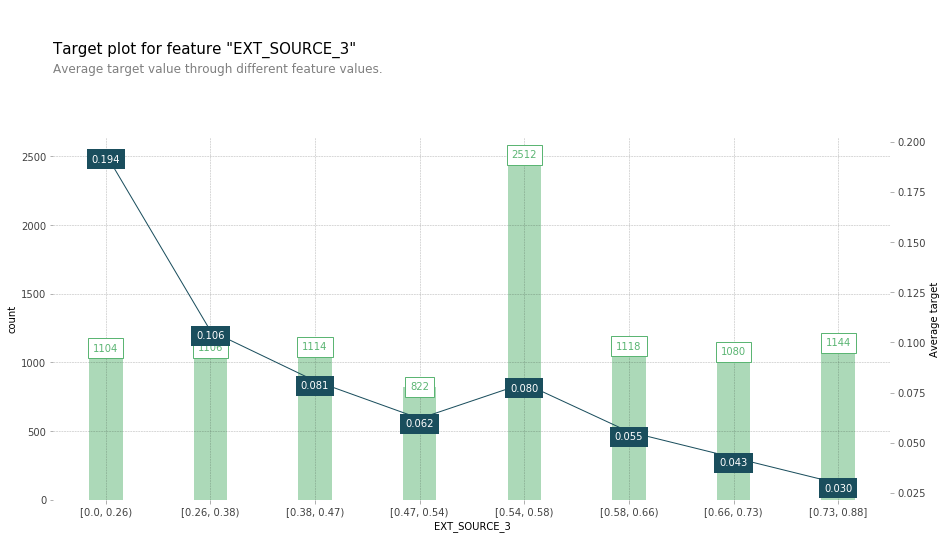

In [102]:
pdpd.info_target('EXT_SOURCE_3')

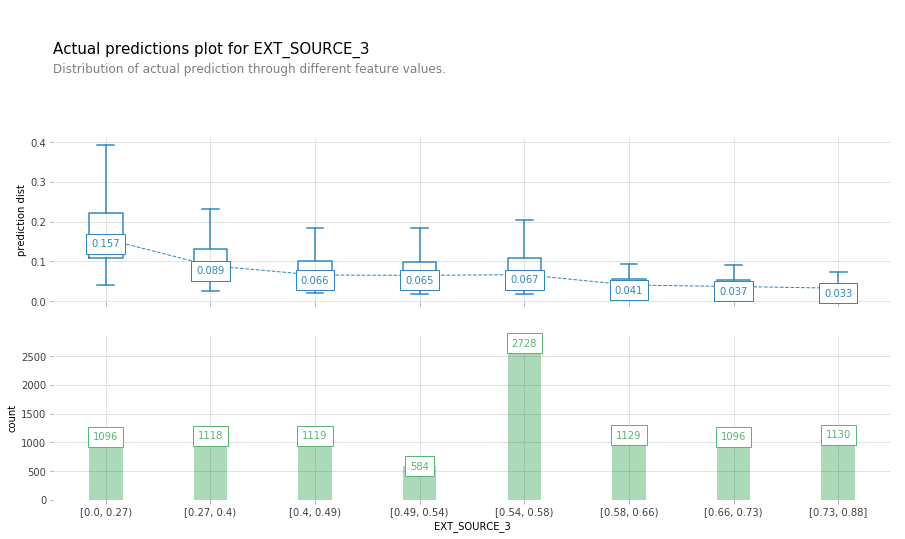

In [103]:
pdpd.info_actual('EXT_SOURCE_3')

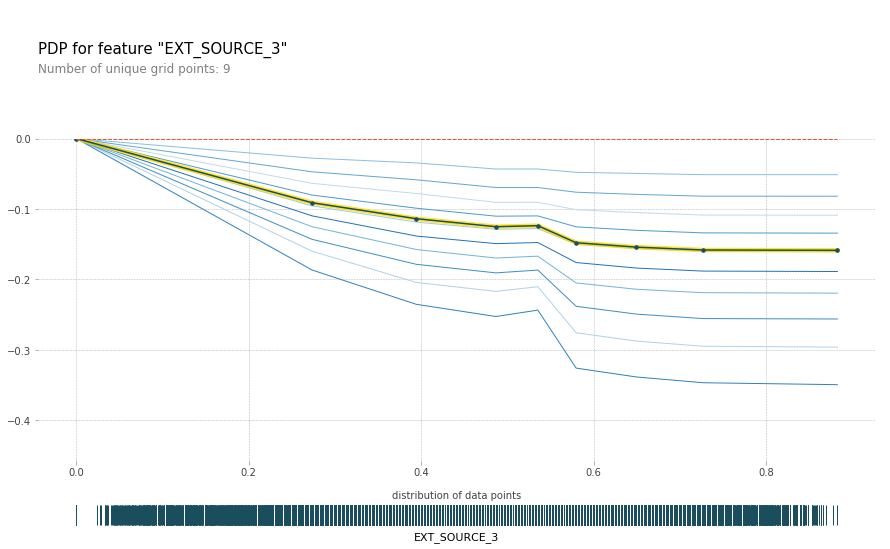

In [110]:
pdpd.isolate('EXT_SOURCE_3')

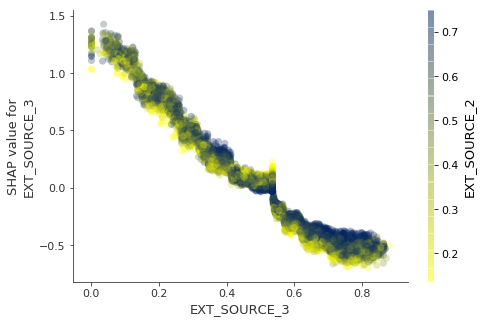

In [108]:
Shap.dependence_plot('EXT_SOURCE_3')

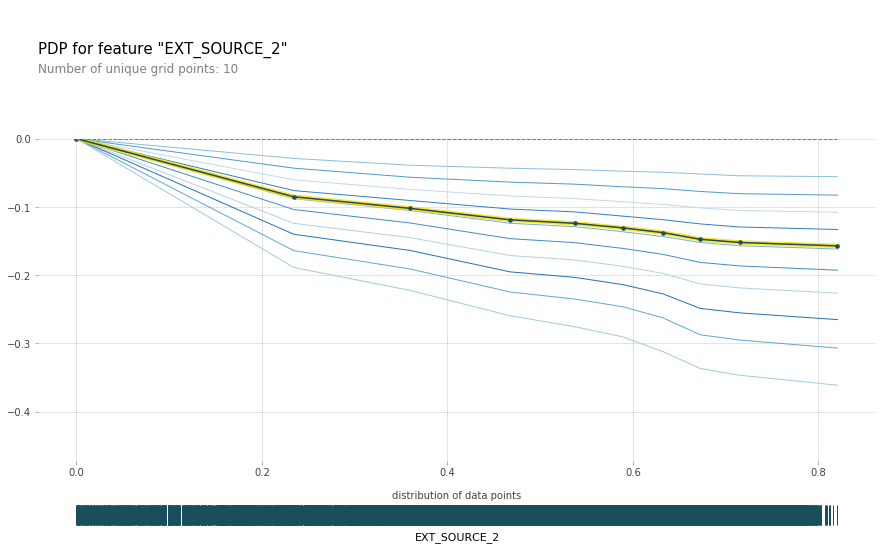

In [125]:
pdpd.isolate('EXT_SOURCE_2')

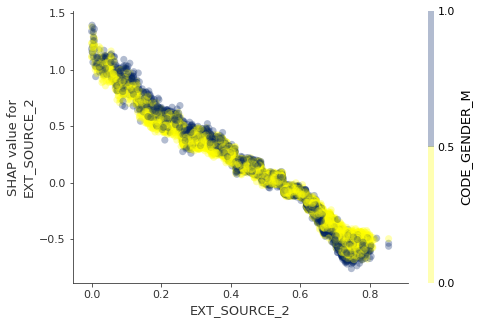

In [126]:
Shap.dependence_plot('EXT_SOURCE_2')

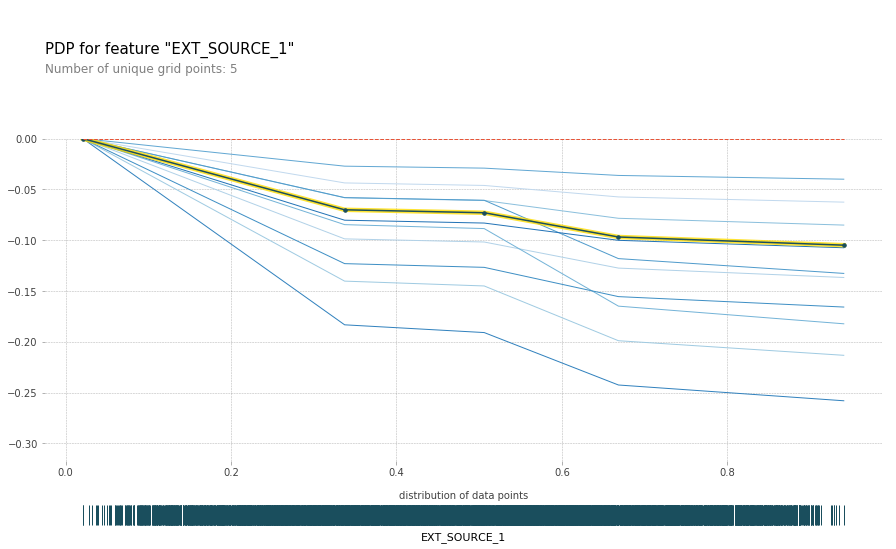

In [127]:
pdpd.isolate('EXT_SOURCE_1')

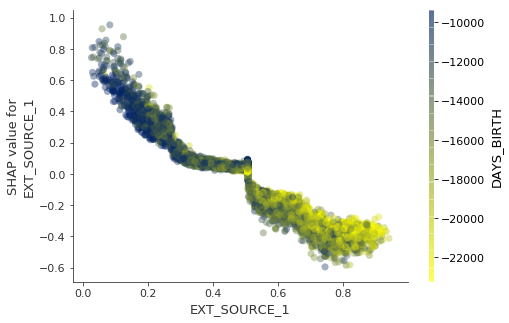

In [129]:
Shap.dependence_plot('EXT_SOURCE_1', alpha=0.4)

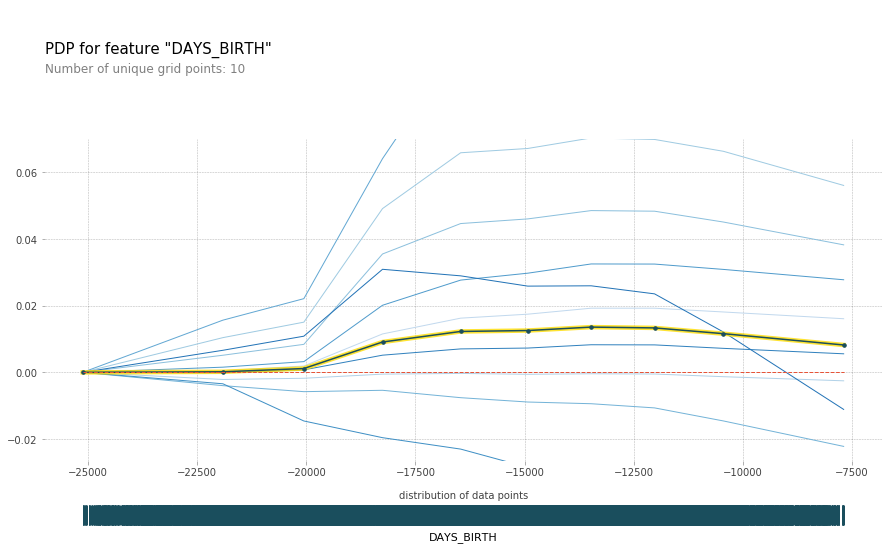

In [184]:
pdpd.isolate('DAYS_BIRTH')

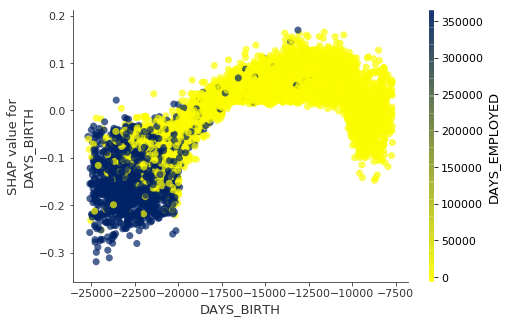

In [181]:
Shap.dependence_plot('DAYS_BIRTH', 'DAYS_EMPLOYED', alpha=0.7)

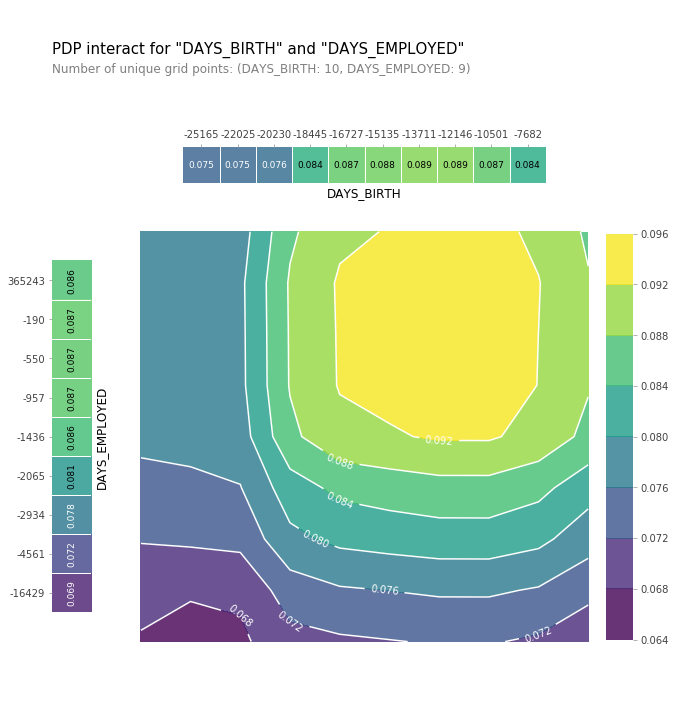

In [182]:
pdpd.pdp_interact(['DAYS_BIRTH', 'DAYS_EMPLOYED'], plot_types = 'contour')

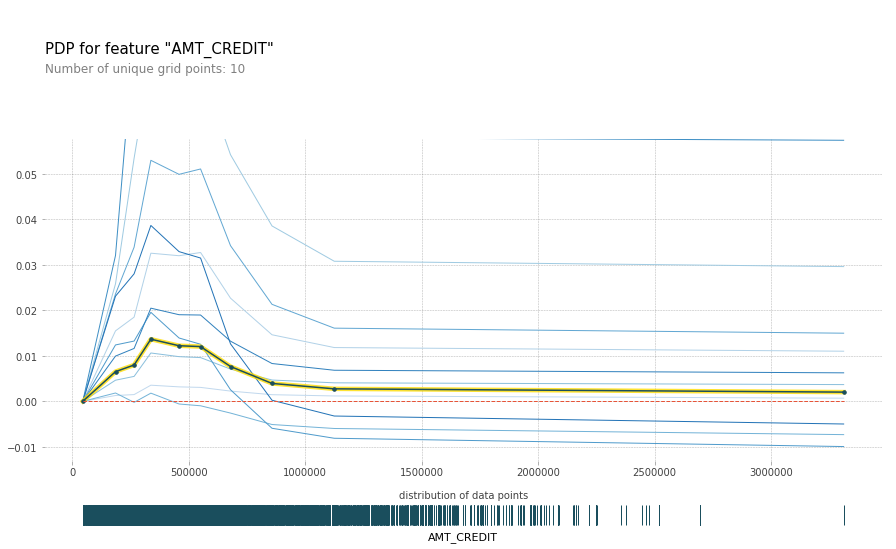

In [185]:
pdpd.isolate('AMT_CREDIT')

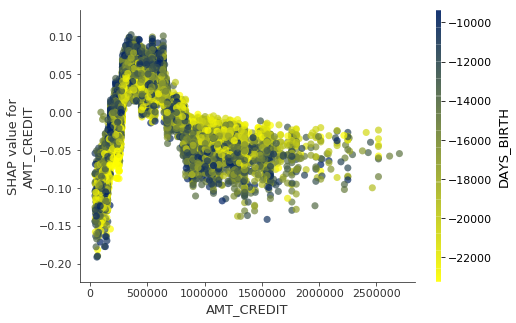

In [183]:
Shap.dependence_plot('AMT_CREDIT', alpha=0.7)

In [171]:
#original
learner.fit(params, *ds.trn_n_val(), early_stopping_rounds=50)

Training until validation scores don't improve for 50 rounds.
[100]	training's binary_logloss: 0.246426	valid_1's binary_logloss: 0.2516
Did not meet early stopping. Best iteration is:
[100]	training's binary_logloss: 0.246426	valid_1's binary_logloss: 0.2516


In [172]:
ds.add('DAYS_BIRTH_DAYS_EMPLOYED_1', lambda df: df['DAYS_BIRTH'] - df['DAYS_EMPLOYED'])

In [173]:
ds.add('DAYS_BIRTH_DAYS_EMPLOYED_2', lambda df: df['DAYS_BIRTH']/df['DAYS_EMPLOYED'])

In [174]:
learner.fit(params, *ds.trn_n_val(), early_stopping_rounds=50)

Training until validation scores don't improve for 50 rounds.
[100]	training's binary_logloss: 0.246336	valid_1's binary_logloss: 0.251543
Did not meet early stopping. Best iteration is:
[100]	training's binary_logloss: 0.246336	valid_1's binary_logloss: 0.251543


In [175]:
Shap2 = SHAP.from_Tree(learner, ds)

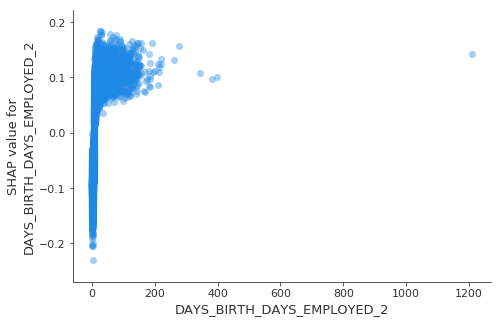

In [179]:
Shap2.dependence_plot('DAYS_BIRTH_DAYS_EMPLOYED_2', None, alpha=0.4)

In [170]:
ds.drop_inplace(['DAYS_BIRTH_DAYS_EMPLOYED_1', 'DAYS_BIRTH_DAYS_EMPLOYED_2'])

In [111]:
ds.x_trn.columns

Index(['EXT_SOURCE_3', 'EXT_SOURCE_2', 'EXT_SOURCE_1', 'DAYS_BIRTH',
       'AMT_CREDIT', 'AMT_ANNUITY', 'NAME_EDUCATION_TYPE_Higher education',
       'DAYS_EMPLOYED', 'CODE_GENDER_F', 'CODE_GENDER_M', 'FLAG_DOCUMENT_3',
       'FLAG_OWN_CAR_N', 'OWN_CAR_AGE', 'OCCUPATION_TYPE',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'NAME_INCOME_TYPE_Working',
       'NAME_EDUCATION_TYPE_Secondary / secondary special',
       'DAYS_LAST_PHONE_CHANGE', 'NAME_CONTRACT_TYPE_Cash loans',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'EXT_SOURCE_1_na', 'NAME_FAMILY_STATUS_Married',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BEGINEXPLUATATION_MODE',
       'REG_CITY_NOT_LIVE_CITY', 'FLAG_OWN_CAR_Y', 'OWN_CAR_AGE_na',
       'NAME_EDUCATION_TYPE_Lower secondary', 'REGION_POPULATION_RELATIVE'],
      dtype='object')